In [1]:
import numpy as np
import scipy as sp

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import lines
import matplotlib.pyplot as plt
import heapq

from PIL import Image

%matplotlib inline 

# Problem 1 - Linear Algebra

$S = span\{v_1, v_2, v_3, v_4\}$ where $v_i$ is defined below

In [2]:
v1 = np.array([1., 2.,  3., 4.])
v2 = np.array([0., 1.,  0., 1.])
v3 = np.array([1., 4.,  3., 6.])
v4 = np.array([2., 11., 6., 15.])

### Dimension of subspace S

In [3]:
A = np.array([v1, v2, v3, v4])
print(np.linalg.matrix_rank(A))

2


### Orthonormal basis of S

In [4]:
# Pick two vectors from S that still span the same linear subspace
print(np.linalg.matrix_rank(np.array([v1, v2])))

2


In [5]:
orth_1 = v1
orth_2 = v2 - ((np.dot(v2, v1) / np.dot(v1, v1)) * v1)
orth_1 = orth_1 / np.linalg.norm(orth_1)
orth_2 = orth_2 / np.linalg.norm(orth_2)

print('Orthonormal Basis Vector 1, b_1 = ' + str(orth_1))
print('Orthonormal Basis Vector 2, b_2 = ' + str(orth_2))
print('Magnitude of b_1: %f' % (np.linalg.norm(orth_1))) # = 1
print('Magnitude of b_2: %f' % (np.linalg.norm(orth_2))) # = 1
print('Dot Product of Basis Vectors: %f' % (np.dot(orth_1, orth_2))) # = 0

Orthonormal Basis Vector 1, b_1 = [ 0.18257419  0.36514837  0.54772256  0.73029674]
Orthonormal Basis Vector 2, b_2 = [-0.2236068   0.67082039 -0.67082039  0.2236068 ]
Magnitude of b_1: 1.000000
Magnitude of b_2: 1.000000
Dot Product of Basis Vectors: -0.000000


### Optimization

Solve the optimization problem $\min_{x \in S}{\Vert x − z^{∗} \Vert_{2}} $ where $ z^{∗} = [1, 0, 0, 0] $.

In [6]:
z = np.array([1., 0., 0., 0.])
S2 = np.array([orth_1, orth_2, z])
print(np.linalg.matrix_rank(S2))

3


Therefore, $z^{*}$ is not in subspace $S$. So, we'll need to find a vector in $S$ that minimizes L2 error.

We find the projection of $z^{*}$ onto $S$ by projecting onto the basis vectors.

In [7]:
z_proj_orth_1 = (np.dot(z, orth_1)) * orth_1
z_proj_orth_2 = (np.dot(z, orth_2)) * orth_2
x = z_proj_orth_1 + z_proj_orth_2
print(x)

[ 0.08333333 -0.08333333  0.25        0.08333333]


# Problem 2 - PCA

### Generate and Plot Data

In [8]:
np.random.seed(56)
k = 20
g1 = np.random.multivariate_normal(mean=[0,0,0], cov=[[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.7]], size=k)
g2 = np.random.multivariate_normal(mean=[1,1,1], cov=[[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.01]], size=k)
combined = np.concatenate([g1, g2])

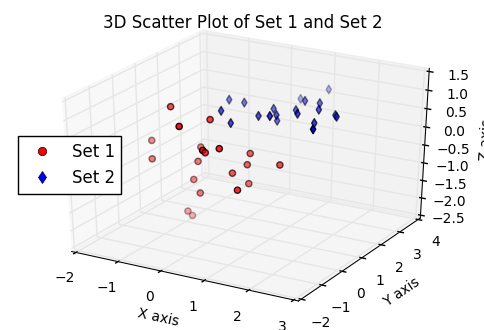

In [9]:
# Setup 3D plot
_3dfig = plt.figure()
ax = _3dfig.add_subplot(111, projection='3d')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Properties of dataset for graphing purposes
set1_prop = {'label':'Set 1', 'marker':'o', 'color':'red'}
set2_prop = {'label':'Set 2', 'marker':'d', 'color':'blue'}

ax.scatter(xs=g1[:,0], ys=g1[:,1], zs=g1[:,2], marker=set1_prop['marker'], c=set1_prop['color'])
ax.scatter(xs=g2[:,0], ys=g2[:,1], zs=g2[:,2], marker=set2_prop['marker'], c=set2_prop['color'])

# Create proxy scatter axes to create customizable legend
scatter1_proxy = lines.Line2D([0],[0], linestyle="none", marker=set1_prop['marker'], c=set1_prop['color'])
scatter2_proxy = lines.Line2D([0],[0], linestyle="none", marker=set2_prop['marker'], c=set2_prop['color'])
ax.legend([scatter1_proxy, scatter2_proxy], [set1_prop['label'], set2_prop['label']], numpoints=1, loc='center left')

plt.title('3D Scatter Plot of Set 1 and Set 2')
plt.show()

The points from Set 1 look like more spread out in the Z-axis than the points from Set 2.
This is explained by the greater variance in the third dimension of Set 1 (0.5) than in Set 2 (0.01).

### Covariance Implementation

In [10]:
def covariance(X1, X2):
    """ Returns the covariance between X1 and X2.
    """
    
    X1_mean = np.mean(X1)
    X2_mean = np.mean(X2)
    
    X1_norm = X1-X1_mean
    X2_norm = X2-X2_mean
    
    N = len(X1) - 1
    
    covar = (np.dot(X1_norm, X2_norm))/N
    return covar

In [11]:
def cov_matrix(X):
    """ Returns the covariance matrix of X.
        Assumes each column in X is a feature and each row is an observation.
        Therefore, if X has n columns, the covariance matrix returned is size n x n.
    """
    
    dim = len(X[0])
    cov_matrix = np.zeros((dim,dim))
    for i in range(dim):
        for j in range(i, dim):
            cov_val = covariance(X[:, i], X[:, j])
            cov_matrix[i][j] = cov_val
            cov_matrix[j][i] = cov_val
    
    return cov_matrix

In [12]:
print(cov_matrix(combined))

[[ 0.92315929  0.34982339  0.46711248]
 [ 0.34982339  0.73245025  0.27061697]
 [ 0.46711248  0.27061697  0.77556553]]


For confirmation, use the numpy builtin function for covariance.

In [13]:
print(np.cov(combined, rowvar=False))

[[ 0.92315929  0.34982339  0.46711248]
 [ 0.34982339  0.73245025  0.27061697]
 [ 0.46711248  0.27061697  0.77556553]]


### PCA Implementation

In [14]:
def max_eigenvectors_of_cov(X, k):
    """ Returns the k maximum eigenvectors of the covariance matrix of X.
        Assumes each column in X is a feature and each row is an observation.
    """
    
    eig = np.linalg.eig(cov_matrix(X))

    eigenvalues = list(eig[0])
    max_eig_vals = heapq.nlargest(k, eigenvalues)
    max_eig_vectors = eig[1][:, 0]

    for i in range(1, k):
        eig_val_index = eigenvalues.index(max_eig_vals[i])
        max_eig_vectors = np.vstack([max_eig_vectors, eig[1][:, eig_val_index]])

    return max_eig_vectors

In [15]:
def project_to_vector(X, vec):
    """ Returns the projections of X onto vec.
        Assumes X is a 2D array where each row is a vector.
    """
    
    vec = vec / np.linalg.norm(vec) # normalize vec
    X_proj = np.zeros(len(X))
    
    for i in range(len(X)):
        X_proj[i] = np.inner(X[i], vec)

    return X_proj
        

In [16]:
def reduce_dim(X, vectors):
    """ Reduce the dimension of X by projecting it on the hyperplane defined by vectors.
        For PCA, use the k maximum eigenvectors of the covariance matrix of X
        to reduce X down to k dimensions.
    """
    
    X_reduced = project_to_vector(X, vectors[0])
    for i in range(1, len(vectors)):
        X_reduced = np.column_stack([X_reduced, project_to_vector(X, vectors[i])])

    return X_reduced

In [17]:
max_eig = max_eigenvectors_of_cov(combined, 2)
g1_reduced = reduce_dim(g1, max_eig)
g2_reduced = reduce_dim(g2, max_eig)

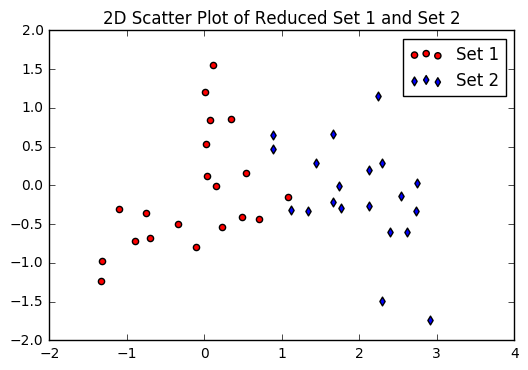

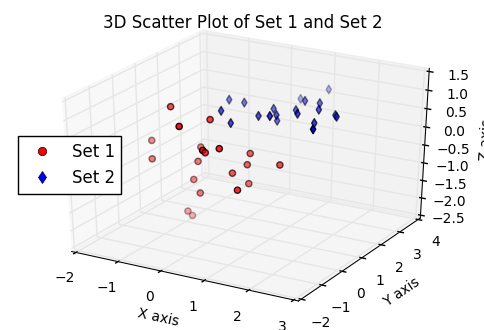

In [18]:
_2dfig = plt.figure()
ax = _2dfig.get_axes

plt.scatter(x=g1_reduced[:,0], y=g1_reduced[:,1], 
            marker=set1_prop['marker'], c=set1_prop['color'], label=set1_prop['label'])
plt.scatter(x=g2_reduced[:,0], y=g2_reduced[:,1], 
            marker=set2_prop['marker'], c=set2_prop['color'], label=set2_prop['label'])
plt.title('2D Scatter Plot of Reduced Set 1 and Set 2')
plt.legend(frameon=True, framealpha=1)
plt.show()
_3dfig

It is easier to distinguish the points from Set 1 and Set 2 when they are reduced by PCA. The 2D plot is simpler to analyze and we can distinctly see that the two sets are centered around different mean values.

# Problem 3 - Low rank approximation (SVD)

PNG (400, 603) LA
('L', 'A')


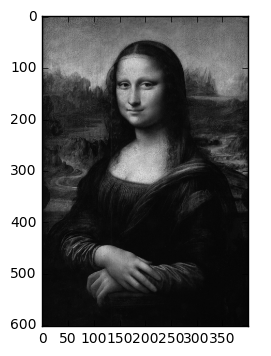

In [19]:
img = Image.open('mona_lisa.png')
plt.figure()
plt.imshow(img);

print(img.format, img.size, img.mode)
print(img.getbands())

### SVD

In [20]:
img_matrix = np.array(list(img.getdata(band=0)), float)
img_matrix.shape = (img.size[1], img.size[0])
img_matrix = np.matrix(img_matrix)
U, sigma, V = np.linalg.svd(img_matrix)

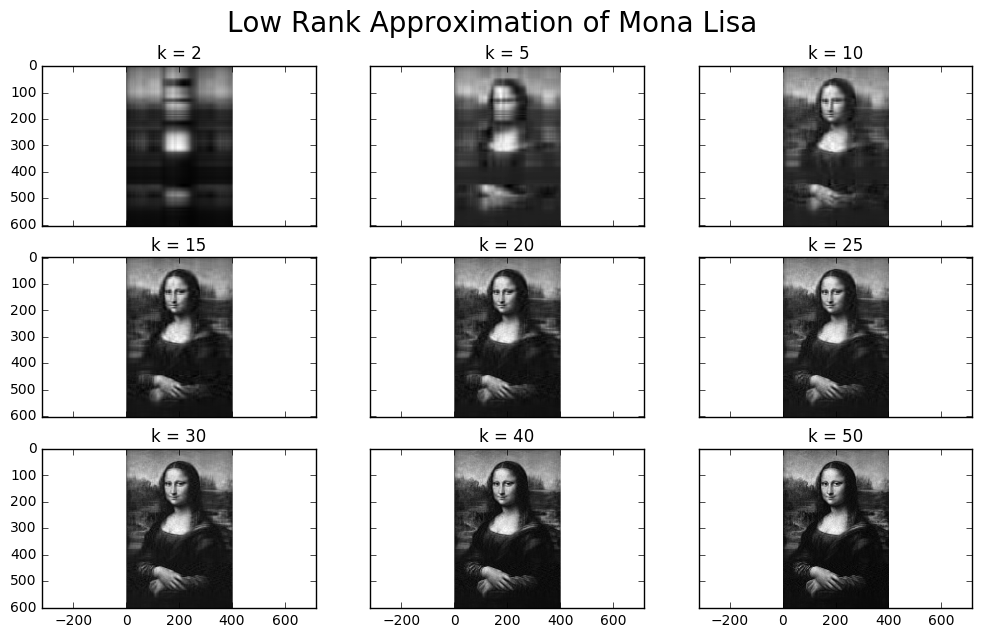

In [21]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12,7))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
k_vals = [2, 5, 10, 15, 20, 25, 30, 40, 50]

for i in range(len(k_vals)):
    k = k_vals[i]
    ax = axes[i]
    
    recontsructed = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    ax.imshow(recontsructed, cmap='gray')
    ax.set_title('k = %s'% k)
    # ax.set_xlim([0, 400])

f.suptitle('Low Rank Approximation of Mona Lisa', fontsize=20)
plt.show()

### Size of k-rank approximations

In [22]:
def size_of_k_rank_approx(img,k):
    """ Returns the size of the low-rank approximation of img in bits.
        img -> SVD -> keep top k singular values
        Assumes each pixel is represented by two bytes.
    """
    width = img.size[0]
    height = img.size[1]

    return width*k*16 + 2*k*16 + height*16

print ('Here is number of bits needed for the low-rank approximations of mona_lisa.png for different rank values.')
print ('This assumes that each pixel is represented by two bytes.')
print ('%-5s %-7s' % ('Rank', 'Bits'))
for k in k_vals:
    print('%-5d %-7d' % (k, size_of_k_rank_approx(img, k)))
print ('%-5s %-7d' % ('Full', img.size[0]*img.size[1]*16))

Here is number of bits needed for the low-rank approximations of mona_lisa.png for different rank values.
This assumes that each pixel is represented by two bytes.
Rank  Bits   
2     22512  
5     41808  
10    73968  
15    106128 
20    138288 
25    170448 
30    202608 
40    266928 
50    331248 
Full  3859200
